In [1]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('gld_price_data.csv')
print(data.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [3]:
df = data[['Date', 'GLD']].copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head())

                  GLD
Date                 
2008-01-02  84.860001
2008-01-03  85.570000
2008-01-04  85.129997
2008-01-07  84.769997
2008-01-08  86.779999


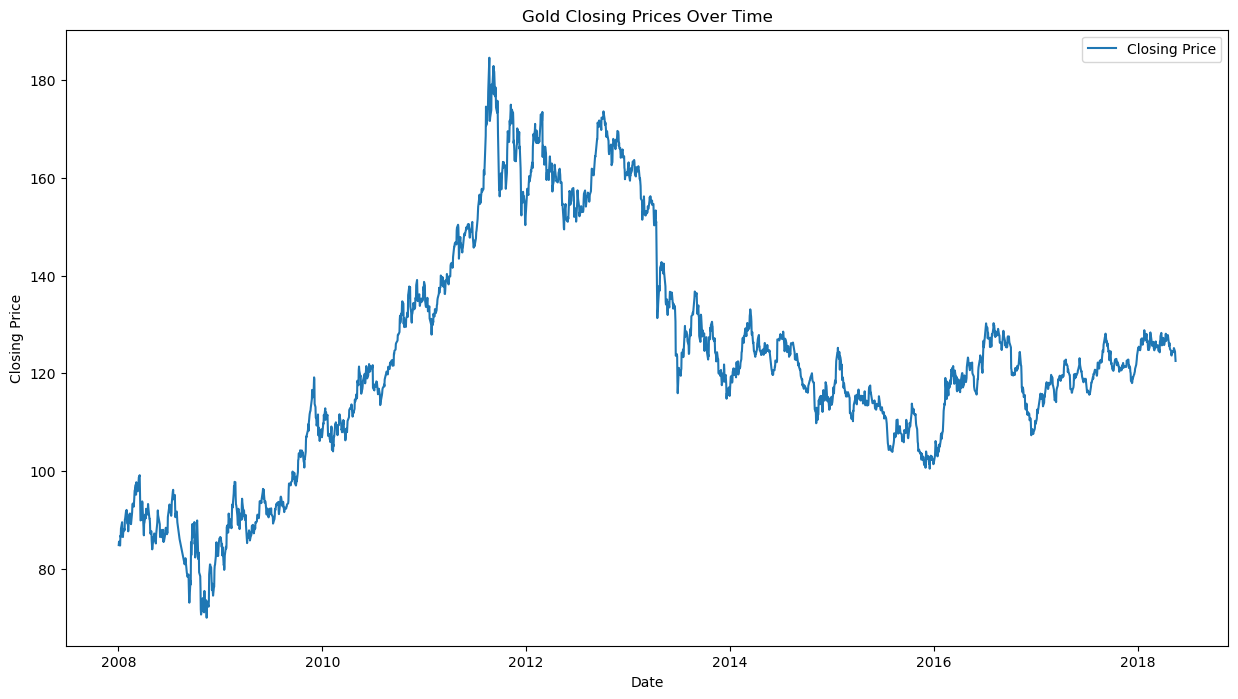

In [4]:
# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['GLD'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.legend()
plt.show()

In [5]:
# Create training and testing datasets
train_start_dt = '2008-01-01'
test_start_dt = '2018-01-01'
train = df.loc[train_start_dt:test_start_dt]
test = df.loc[test_start_dt:]
train.head()

,GLD
Date,
2008-01-02,84.860001
2008-01-03,85.570000
2008-01-04,85.129997
2008-01-07,84.769997
2008-01-08,86.779999


In [6]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [7]:
# Sử dụng auto_arima để tìm tham số p, d, q tốt nhất
auto_arima_model = pm.auto_arima(train['GLD'], 
                                 start_p=1, start_q=1,  # Khởi đầu cho p và q
                                 max_p=5, max_q=5,  # Giới hạn tối đa của p và q
                                 start_d=0, max_d=5,  # Tìm d trong khoảng từ 0 đến 2 (hoặc hơn nếu cần)
                                 seasonal=False,  # Dữ liệu không có tính chu kỳ
                                 trace=True,  # Hiển thị kết quả của mỗi lần thử nghiệm
                                 stepwise=True)  # Sử dụng phương pháp tìm kiếm tối ưu


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8202.403, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8210.840, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8209.409, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8209.568, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8209.121, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8203.303, Time=3.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8203.325, Time=3.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8210.369, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8210.011, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8201.342, Time=5.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8208.349, Time=5.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8208.390, Time=4.87 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8209.991, Time=1.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8210.196, Time=1.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

In [8]:
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2203
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4094.814
Date:                Sat, 28 Sep 2024   AIC                           8199.628
Time:                        21:57:43   BIC                           8228.113
Sample:                             0   HQIC                          8210.036
                               - 2203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3383      0.037    -35.710      0.000      -1.412      -1.265
ar.L2         -0.9105      0.035    -25.994      0.000      -0.979      -0.842
ma.L1          1.3169      0.036     36.370      0.0

In [9]:
# Khởi tạo mô hình ARIMA với tham số 
model = ARIMA(train['GLD'], order=(2, 1, 2))

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
# Huấn luyện mô hình
model_fit = model.fit()

In [11]:
# In tóm tắt kết quả mô hình
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    GLD   No. Observations:                 2203
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4094.814
Date:                Sat, 28 Sep 2024   AIC                           8199.628
Time:                        21:57:45   BIC                           8228.113
Sample:                             0   HQIC                          8210.036
                               - 2203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3383      0.037    -35.710      0.000      -1.412      -1.265
ar.L2         -0.9105      0.035    -25.994      0.000      -0.979      -0.842
ma.L1          1.3169      0.036     36.370      0.0

In [26]:
n_periods = len(test)
forecast = model_fit.forecast(steps=1)

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [20]:
n_periods

87

In [27]:
# Hiển thị kết quả dự báo
print(forecast)

2203    123.642287
dtype: float64


In [22]:
# Chuyển đổi giá trị dự báo thành DataFrame và ghép ngày tương ứng
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecasted'])

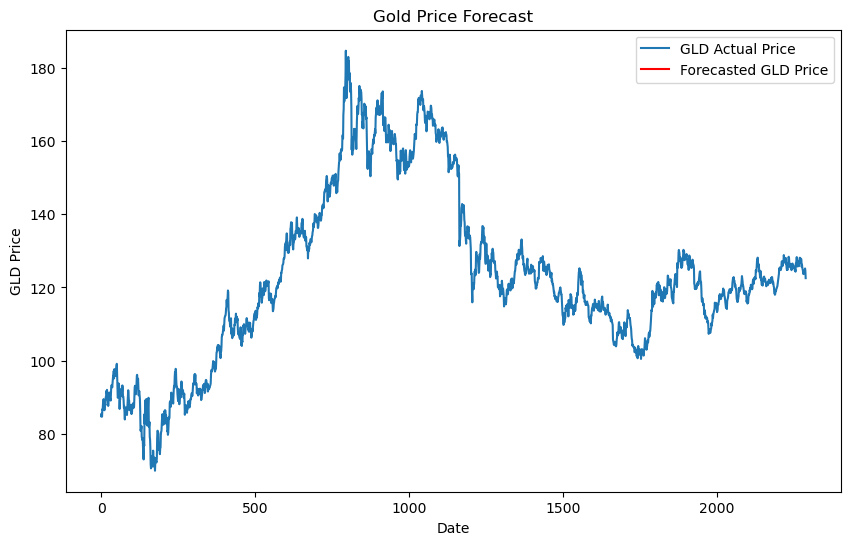

In [23]:
# Vẽ biểu đồ dự báo
plt.figure(figsize=(10, 6))
plt.plot(data['GLD'], label='GLD Actual Price')
plt.plot(forecast, label='Forecasted GLD Price', color='red')
plt.title('Gold Price Forecast')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [24]:
# Tính toán các chỉ số đánh giá mô hình
mse = mean_squared_error(test['GLD'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['GLD'], forecast)
mape = np.mean(np.abs((test['GLD'] - forecast) / test['GLD'])) * 100
r2 = r2_score(test['GLD'], forecast)

ValueError: Found input variables with inconsistent numbers of samples: [87, 1]

In [25]:
# In các chỉ số
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

MSE: 7.098470224586523
RMSE: 2.6642954461895783
MAE: 2.370306365428605
MAPE: nan%
R²: -3.42403228054114
